<a href="https://colab.research.google.com/github/ferit-osirv/lab-3-23-24-niksaa0911/blob/main/LV3_NikolinaPejic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install opencv-python numpy matplotlib

Assignment 1: Color and Chroma Quantization
RGB Color Quantization:

Load an RGB image, where each channel is initially 8 bits.
Quantize to 7 bits per channel by mapping the 256 original levels to 128.
Calculate the compression ratio (how many bits are needed to represent the original image vs. the quantized image).
YCbCr Chroma Quantization:

Convert the RGB image to YCbCr using cv2.cvtColor(). Y represents luminance; Cb and Cr represent chrominance.
Perform quantization on the Cb and Cr channels to reduce color detail. I.e. reduce chroma resolution by a factor of 2 so that there are 128 unique levels.
Compute the compression ratio and compare with RGB quantization.
Analysis:

Display the original, color quantized, and chroma quantized images for visual comparison.
Evaluate the compression ratios and discuss the balance between compression efficiency and image fidelity.
What is the difference when quantizing color channels vs. chroma channels? Why might chroma quantization be more efficient?

Current working directory: /content
File exists: baboon.bmp


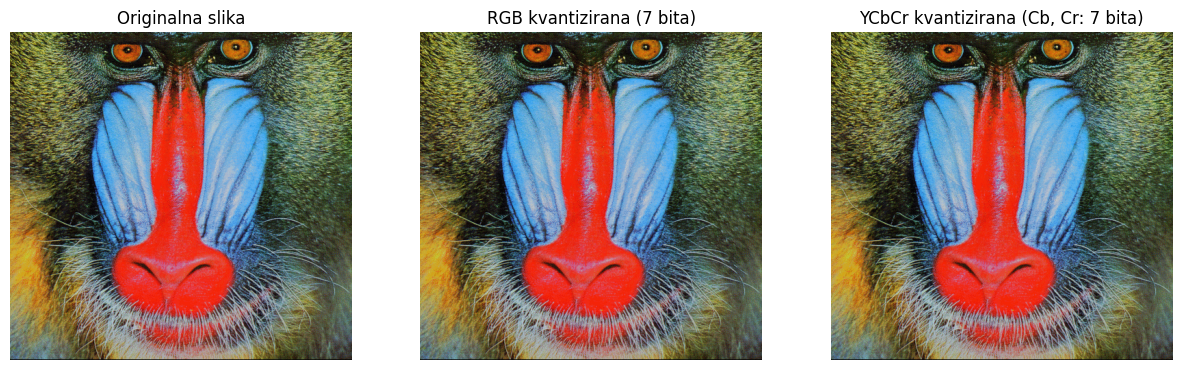

Kompresijski omjer (RGB kvantizacija): 1.14
Kompresijski omjer (YCbCr kvantizacija): 1.09

Analiza:
Razlika u kvantizaciji RGB i YCbCr prostora je u percepciji ljudskog oka. Kvantizacija Cb i Cr kanala smanjuje detalje u bojama, što je manje primjetno jer je ljudsko oko osjetljivije na svjetlinu (Y).


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funkcija za učitavanje i prikaz slika
def prikazi_slike(naslovi, slike, broj_redova=1, broj_stupaca=3):
    plt.figure(figsize=(15, 5))
    for i, slika in enumerate(slike):
        plt.subplot(broj_redova, broj_stupaca, i + 1)
        if len(slika.shape) == 3:  # RGB slika
            plt.imshow(cv2.cvtColor(slika, cv2.COLOR_BGR2RGB))
        else:  # Siva slika
            plt.imshow(slika, cmap='gray')
        plt.title(naslovi[i])
        plt.axis('off')
    plt.show()

# Učitavanje slike
putanja = "baboon.bmp"  # Promijeni u putanju tvoje slike

# Print the current working directory to verify the location
import os
print("Current working directory:", os.getcwd())

# Check if the file exists
if os.path.exists(putanja):
    print("File exists:", putanja)
else:
    print("File not found:", putanja)
    # If file not found, exit the script
    exit()

slika_original = cv2.imread(putanja)

# 1. Kvantizacija RGB slike (7 bita po kanalu)
slika_kvantizirana = (slika_original // 2) * 2

# Izračun kompresijskog omjera za RGB kvantizaciju
original_bita = slika_original.size * 8
kvantizirana_bita = slika_kvantizirana.size * 7
rgb_kompresijski_omjer = original_bita / kvantizirana_bita

# 2. Kvantizacija u YCbCr prostoru
slika_ycbcr = cv2.cvtColor(slika_original, cv2.COLOR_BGR2YCrCb)
Y, Cb, Cr = cv2.split(slika_ycbcr)

# Kvantizacija Cb i Cr kanala na 128 razina (7 bita)
Cb_kvantizirano = (Cb // 2) * 2
Cr_kvantizirano = (Cr // 2) * 2

# Spajanje kanala natrag
slika_ycbcr_kvantizirana = cv2.merge((Y, Cb_kvantizirano, Cr_kvantizirano))
slika_kvantizirana_ycbcr = cv2.cvtColor(slika_ycbcr_kvantizirana, cv2.COLOR_YCrCb2BGR)

# Izračun kompresijskog omjera za YCbCr kvantizaciju
ycbcr_bita = Y.size * 8 + Cb_kvantizirano.size * 7 + Cr_kvantizirano.size * 7
ycbcr_kompresijski_omjer = original_bita / ycbcr_bita


# Prikaz slika
prikazi_slike(
    ["Originalna slika", "RGB kvantizirana (7 bita)", "YCbCr kvantizirana (Cb, Cr: 7 bita)"],
    [slika_original, slika_kvantizirana, slika_kvantizirana_ycbcr]
)

# Ispis rezultata
print(f"Kompresijski omjer (RGB kvantizacija): {rgb_kompresijski_omjer:.2f}")
print(f"Kompresijski omjer (YCbCr kvantizacija): {ycbcr_kompresijski_omjer:.2f}")
print("\nAnaliza:")
print("Razlika u kvantizaciji RGB i YCbCr prostora je u percepciji ljudskog oka. Kvantizacija Cb i Cr kanala smanjuje detalje u bojama, što je manje primjetno jer je ljudsko oko osjetljivije na svjetlinu (Y).")


Assignment 2: Low and High-Pass Filters
Task 1: Low-Pass Filtering
Create a circular mask with high values (1) in the center and low values (0) towards the edges. The size of the central high-value area determines the cutoff frequency.
Multiply the Fourier-transformed image by this mask to apply the low-pass filter.
Perform an inverse Fourier Transform to convert back to the spatial domain.
Task 2: High-Pass Filtering
Construct a mask that is the inverse of the low-pass filter: low values (0) in the center transitioning to high values (1) at the edges.
Apply this mask to the Fourier-transformed image to implement the high-pass filter.
Use the inverse Fourier Transform to return to the spatial domain.
Note: Remember that fftshift is used to center the low frequencies in the Fourier-transformed image. You will need to use ifftshift to undo this operation before applying the inverse Fourier Transform.

ValueError: num must be an integer with 1 <= num <= 2, not 3

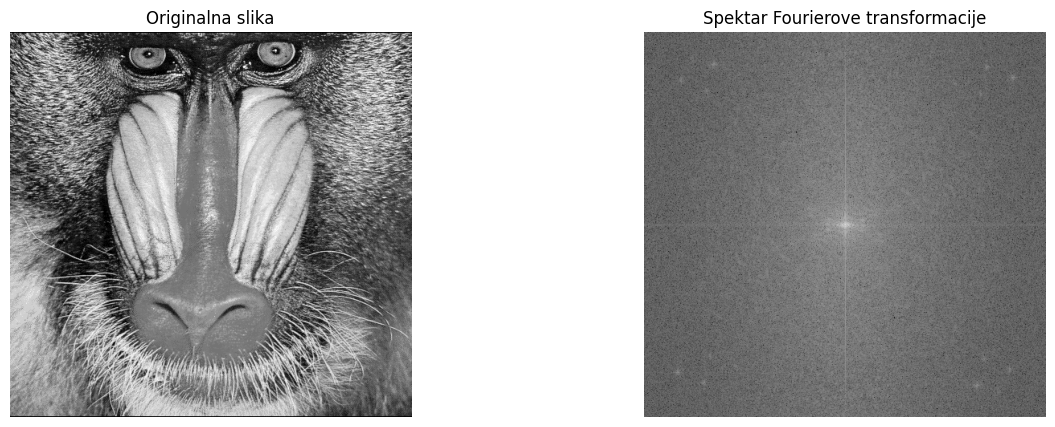

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funkcija za prikaz slika
def prikazi_slike(naslovi, slike, broj_redova=1, broj_stupaca=3):
    plt.figure(figsize=(15, 5))
    for i, slika in enumerate(slike):
        plt.subplot(broj_redova, broj_stupaca, i + 1)
        if len(slika.shape) == 3:  # RGB slika
            plt.imshow(cv2.cvtColor(slika, cv2.COLOR_BGR2RGB))
        else:  # Siva slika
            plt.imshow(slika, cmap='gray')
        plt.title(naslovi[i])
        plt.axis('off')
    plt.show()

# Učitavanje slike u sivoj skali
putanja = "baboon.bmp"
slika = cv2.imread(putanja, cv2.IMREAD_GRAYSCALE)

# Fourierova transformacija
f = np.fft.fft2(slika)
fshift = np.fft.fftshift(f)
magnituda = 20 * np.log(np.abs(fshift))  # Za vizualizaciju

# Dimenzije slike i središnje koordinate
visina, sirina = slika.shape
cx, cy = sirina // 2, visina // 2

# Task 1: Niskopropusni filter
# Stvaranje kružne maske
radius = 50  # Polumjer kružne maske (možeš prilagoditi)
lp_mask = np.zeros((visina, sirina), dtype=np.uint8)
cv2.circle(lp_mask, (cx, cy), radius, 1, -1)

# Primjena maske na Fourierov spektar
lp_filtered = fshift * lp_mask

# Inverzna Fourierova transformacija za vraćanje u prostornu domenu
lp_ifshift = np.fft.ifftshift(lp_filtered)
lp_img = np.fft.ifft2(lp_ifshift)
lp_img = np.abs(lp_img)

# Task 2: Visokopropusni filter
# Stvaranje maske kao inverzija niskopropusnog filtera
hp_mask = 1 - lp_mask

# Primjena maske na Fourierov spektar
hp_filtered = fshift * hp_mask

# Inverzna Fourierova transformacija za vraćanje u prostornu domenu
hp_ifshift = np.fft.ifftshift(hp_filtered)
hp_img = np.fft.ifft2(hp_ifshift)
hp_img = np.abs(hp_img)

# Prikaz rezultata
prikazi_slike(
    ["Originalna slika", "Spektar Fourierove transformacije", "Niskopropusni filter", "Visokopropusni filter"],
    [slika, magnituda, lp_img, hp_img],
    broj_stupaca=2
)


Assignment 3: Image Compression With FT
Task 1: Identifying and Retaining Top N Frequencies
Convert a grayscale image to the frequency domain using numpy.fft.fft2().
From the magnitude spectrum, identify the top  N  frequencies with the highest magnitudes. Use numpy.argsort() to rank frequencies and select the top  N . You can use  N=104  as a good starting point.
Create a mask that retains only these  N  frequencies, setting all other frequencies to zero. Apply this mask to the Fourier Transform of the image.
Task 2: Image Reconstruction and Compression Evaluation
Inverse-transform the modified frequency representation back to the spatial domain using numpy.fft.ifft2().
Compare the reconstructed image with the original to evaluate the effects of retaining only the top  N  frequencies.
Discuss the compression achieved and its impact on image quality, particularly noting which features are preserved or lost.

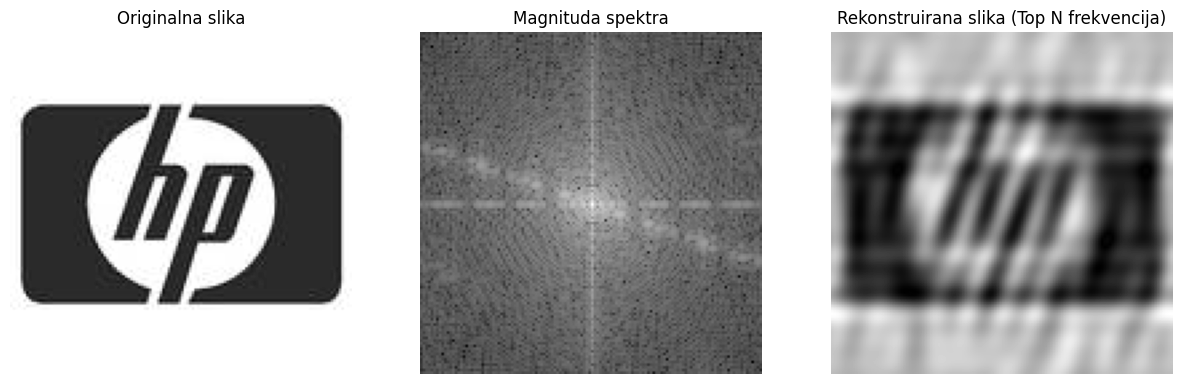

Kompresijski omjer: 27.40

Analiza:
Zadržavanjem samo top N frekvencija postižemo značajnu kompresiju.
Rekonstruirana slika gubi detalje, ali osnovne strukture ostaju prepoznatljive.
Ova metoda dobro očuva dominantne frekvencije koje su ključne za percepciju slike.


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funkcija za prikaz slika
def prikazi_slike(naslovi, slike, broj_redova=1, broj_stupaca=3):
    plt.figure(figsize=(15, 5))
    for i, slika in enumerate(slike):
        plt.subplot(broj_redova, broj_stupaca, i + 1)
        if len(slika.shape) == 3:
            plt.imshow(cv2.cvtColor(slika, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(slika, cmap='gray')
        plt.title(naslovi[i])
        plt.axis('off')
    plt.show()

# Učitavanje slike u sivoj skali
putanja = "hp_logo.jpg"
slika = cv2.imread(putanja, cv2.IMREAD_GRAYSCALE)

# Fourierova transformacija slike
f_transform = np.fft.fft2(slika)
f_shift = np.fft.fftshift(f_transform)  # Centriranje niskih frekvencija
magnituda = np.abs(f_shift)

# Task 1: Pronalaženje i zadržavanje top N frekvencija
N = 104  # Broj frekvencija koje ćemo zadržati
indeksi = np.argsort(magnituda.ravel())[::-1]  # Sortiranje indeksa po veličini (silazno)
top_N_indeksi = indeksi[:N]  # Zadržavamo samo prvih N

# Stvaranje maske za zadržavanje top N frekvencija
maska = np.zeros_like(f_shift, dtype=bool)
for idx in top_N_indeksi:
    x, y = np.unravel_index(idx, magnituda.shape)
    maska[x, y] = True

# Primjena maske na Fourierov spektar
f_shift_maskirano = np.zeros_like(f_shift)
f_shift_maskirano[maska] = f_shift[maska]

# Task 2: Rekonstrukcija slike
f_ishift = np.fft.ifftshift(f_shift_maskirano)  # Uklanjanje pomaka
rekonstruirana_slika = np.fft.ifft2(f_ishift)
rekonstruirana_slika = np.abs(rekonstruirana_slika)

# Izračun kompresije
original_bita = slika.size * 8
kompresirani_bita = N * (np.log2(slika.size) + 32)  # Pohranjujemo N i koordinate
kompresijski_omjer = original_bita / kompresirani_bita

# Prikaz slika
prikazi_slike(
    ["Originalna slika", "Magnituda spektra", "Rekonstruirana slika (Top N frekvencija)"],
    [slika, 20 * np.log(1 + magnituda), rekonstruirana_slika],
    broj_stupaca=3
)

# Ispis rezultata
print(f"Kompresijski omjer: {kompresijski_omjer:.2f}")
print("\nAnaliza:")
print("Zadržavanjem samo top N frekvencija postižemo značajnu kompresiju.")
print("Rekonstruirana slika gubi detalje, ali osnovne strukture ostaju prepoznatljive.")
print("Ova metoda dobro očuva dominantne frekvencije koje su ključne za percepciju slike.")


Assignment 4: Image Compression Coding and Decoding
Task 1: Compression Function
Function: compress_image(image, p)
Inputs:
image: The input grayscale image.
p: The percentage of the top frequencies to retain.
Process:
Convert the image to the frequency domain using the Fourier Transform.
Identify and retain only the top p% of frequencies based on their magnitudes.
Encode the Fourier Transform as a list of tuples (x, y, FT coefficient) for each non-zero coefficient, where x and y are the coordinates in the frequency domain.
Output: The coded representation of the image based on non-zero Fourier coefficients.
Task 2: Reconstruction Function
Function: reconstruct_image(coded_representation, image_shape)
Inputs:
coded_representation: The list of non-zero Fourier coefficients and their positions obtained from the compression function.
image_shape: The shape of the original image to guide the reconstruction.
Process:
Recreate the frequency domain representation of the image based on the coded representation.
Apply an inverse Fourier Transform to convert the frequency domain representation back to the spatial domain, reconstructing the image.
Output: The reconstructed image from the coded frequency representation.
Task 3: Analysis and Comparison
Apply the compress_image function to a test image at 1%, 10%, and 100% frequency retention levels to obtain different compressed representations.
Use the reconstruct_image function to reconstruct images from these compressed representations.
Compare the sizes of the coded representations at each level and calculate the compression ratios. Calculate a compression ratio as the ratio of the original image size to the coded representation size for each level.
Analyze and discuss the visual quality of the reconstructed images in comparison to the original.

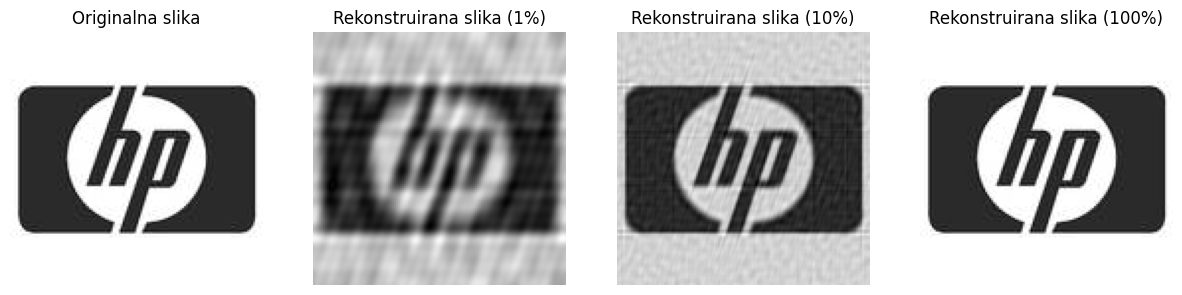


Postotak zadržanih frekvencija: 1%
Veličina kodirane reprezentacije: 163 koeficijenata
Kompresijski omjer: 6.28

Postotak zadržanih frekvencija: 10%
Veličina kodirane reprezentacije: 1638 koeficijenata
Kompresijski omjer: 0.63

Postotak zadržanih frekvencija: 100%
Veličina kodirane reprezentacije: 16384 koeficijenata
Kompresijski omjer: 0.06

Analiza:
Manji postotak zadržanih frekvencija rezultira većom kompresijom, ali dolazi do gubitka detalja u slici.
Kod zadržavanja 1% frekvencija, slika je značajno degradirana, dok zadržavanje 10% daje balans između kvalitete i kompresije.
Zadržavanje 100% frekvencija rezultira savršenom rekonstrukcijom, ali bez kompresije.


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Funkcija za prikaz slika
def prikazi_slike(naslovi, slike, broj_redova=1, broj_stupaca=3):
    plt.figure(figsize=(15, 5))
    for i, slika in enumerate(slike):
        plt.subplot(broj_redova, broj_stupaca, i + 1)
        if len(slika.shape) == 3:
            plt.imshow(cv2.cvtColor(slika, cv2.COLOR_BGR2RGB))
        else:
            plt.imshow(slika, cmap='gray')
        plt.title(naslovi[i])
        plt.axis('off')
    plt.show()

# Funkcija za kompresiju slike
def compress_image(image, p):
    # Fourierova transformacija
    f_transform = np.fft.fft2(image)
    f_shift = np.fft.fftshift(f_transform)  # Centriranje niskih frekvencija
    magnituda = np.abs(f_shift)

    # Broj frekvencija koje treba zadržati
    total_frekvencije = image.size
    n_top = int(total_frekvencije * (p / 100))

    # Pronalaženje top p% frekvencija
    indeksi = np.argsort(magnituda.ravel())[::-1]  # Sortiranje silazno
    top_indeksi = indeksi[:n_top]

    # Kodiranje koeficijenata kao (x, y, FT koeficijent)
    coded_representation = []
    for idx in top_indeksi:
        x, y = np.unravel_index(idx, magnituda.shape)
        coded_representation.append((x, y, f_shift[x, y]))

    return coded_representation

# Funkcija za rekonstrukciju slike
def reconstruct_image(coded_representation, image_shape):
    # Kreiranje praznog Fourierovog spektra
    f_shift_reconstructed = np.zeros(image_shape, dtype=complex)

    # Popunjavanje spektra s kodiranim koeficijentima
    for x, y, koef in coded_representation:
        f_shift_reconstructed[x, y] = koef

    # Inverzna Fourierova transformacija
    f_ishift = np.fft.ifftshift(f_shift_reconstructed)
    reconstructed_image = np.fft.ifft2(f_ishift)
    return np.abs(reconstructed_image)

# Glavni program
# Učitavanje slike u sivoj skali
putanja = "hp_logo.jpg"
original_image = cv2.imread(putanja, cv2.IMREAD_GRAYSCALE)

# Primjena funkcije kompresije i rekonstrukcije za 1%, 10%, i 100%
procenti = [1, 10, 100]
rekonstruirane_slike = []
velicine_reprezentacije = []

for p in procenti:
    coded = compress_image(original_image, p)
    velicine_reprezentacije.append(len(coded))
    rekonstruirane_slike.append(reconstruct_image(coded, original_image.shape))

# Izračun kompresijskog omjera
original_bita = original_image.size * 8
kompresijski_omjeri = [original_bita / (coded * (2 * 32 + 64)) for coded in velicine_reprezentacije]

# Prikaz slika
prikazi_slike(
    [f"Originalna slika"] + [f"Rekonstruirana slika ({p}%)" for p in procenti],
    [original_image] + rekonstruirane_slike,
    broj_stupaca=4
)

# Ispis rezultata
for i, p in enumerate(procenti):
    print(f"\nPostotak zadržanih frekvencija: {p}%")
    print(f"Veličina kodirane reprezentacije: {velicine_reprezentacije[i]} koeficijenata")
    print(f"Kompresijski omjer: {kompresijski_omjeri[i]:.2f}")

print("\nAnaliza:")
print("Manji postotak zadržanih frekvencija rezultira većom kompresijom, ali dolazi do gubitka detalja u slici.")
print("Kod zadržavanja 1% frekvencija, slika je značajno degradirana, dok zadržavanje 10% daje balans između kvalitete i kompresije.")
print("Zadržavanje 100% frekvencija rezultira savršenom rekonstrukcijom, ali bez kompresije.")
